## Esercizio Classificazione NLP2

In [2]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/text_2_clean.csv'

In [3]:
df = pd.read_csv(path)
df

textID                                               text  \
0      cb774db0d1                I`d have responded, if I were going   
1      549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2      088c60f138                          my boss is bullying me...   
3      9642c003ef                     what interview! leave me alone   
4      358bd9e861   Sons of ****, why couldn`t they put them on t...   
...           ...                                                ...   
27476  4eac33d1c0   wish we could come see u on Denver  husband l...   
27477  4f4c4fc327   I`ve wondered about rake to.  The client has ...   
27478  f67aae2310   Yay good for both of you. Enjoy the break - y...   
27479  ed167662a5                         But it was worth it  ****.   
27480  6f7127d9d7     All this flirting going on - The ATG smiles...   

                                           selected_text sentiment  
0                    I`d have responded, if I were going   neutral  
1                                               Sooo SAD  negative  
2                                            bullying me  negative  
3                                         leave me alone  negative  
4                                          Sons of ****,  negative  
...                                                  ...       ...  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          Yay good for both of you.  positive  
27479                         But it was worth it  ****.  positive  
27480  All this flirting going on - The ATG smiles. Y...   neutral  

[27481 rows x 4 columns]

Prima riga

In [4]:
df['text'][0]

' I`d have responded, if I were going'

In [5]:
# Definisci i pattern della REGEX


patterns = {
             r'\d+': '',             # remove digits (numeri)
             #r'\b': '',               # rimuove tutte le n'
             r'[^\w\s]': '',         # remove punteggiatura e simboli ...,'@!£$%
             r'\b\w{1,2}\b':'',      # remove all token less than2 characters
             r'(http|www)[^\s]+':'', # remove website
             r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

#solo in preview
clean_column(df, 'text', patterns)

textID                                               text  \
0      cb774db0d1                          have responded were going   
1      549e992a42              sooo sad will miss you here san diego   
2      088c60f138                                     boss bullying    
3      9642c003ef                         what interview leave alone   
4      358bd9e861   sons why couldnt they put them the releases a...   
...           ...                                                ...   
27476  4eac33d1c0   wish could come see denver husband lost his j...   
27477  4f4c4fc327   ive wondered about rake the client has made c...   
27478  f67aae2310   yay good for both you enjoy the break you pro...   
27479  ed167662a5                                     but was worth    
27480  6f7127d9d7    all this flirting going the atg smiles yay hugs   

                                           selected_text sentiment  
0                    I`d have responded, if I were going   neutral  
1                                               Sooo SAD  negative  
2                                            bullying me  negative  
3                                         leave me alone  negative  
4                                          Sons of ****,  negative  
...                                                  ...       ...  
27476                                             d lost  negative  
27477                                      , don`t force  negative  
27478                          Yay good for both of you.  positive  
27479                         But it was worth it  ****.  positive  
27480  All this flirting going on - The ATG smiles. Y...   neutral  

[27481 rows x 4 columns]

In [6]:
df['text'][0]

' have responded were going'

Conversione in stringhe 

In [7]:
text = list(map(str, df['text'])) #trasformi la collonna in stringa 
text = ''.join(text)

In [8]:
text

' have responded were going sooo sad will miss you here san diego boss bullying  what interview leave alone sons why couldnt they put them the releases already bought some shameless plugging for the best rangers forum earth feedings for the baby are fun when all smiles and coossoooo high both you journey wow just became cooler hehe that possible much love hopeful reckon the chances are minimal never gonna get cake and stuff really really like the song love story taylor swift sharpie running dangerously low ink want music tonight but lost voicetest test from the env sunburned sok trying plot alternatives speak sighive been sick for the past few days and thus hair looks wierd didnt have hat would look  back home now gonna miss every onehes just not that into you marly sorry hope you find her soon playing ghost online really interesting the new updates are kirin pet and metamorph for third job cant wait have dragon pet cleaning the house for her family who comming later todaygotta restart

In [9]:
text_neutral = list(map(str, df[df['sentiment']=='neutral']['text']))
text_positive = list(map(str, df[df['sentiment']=='positive']['text']))
text_negative = list(map(str, df[df['sentiment']=='negative']['text']))

text_neutral = ''.join(text_neutral)
text_positive = ''.join(text_positive)
text_negative = ''.join(text_negative)

(-0.5, 799.5, 399.5, -0.5)

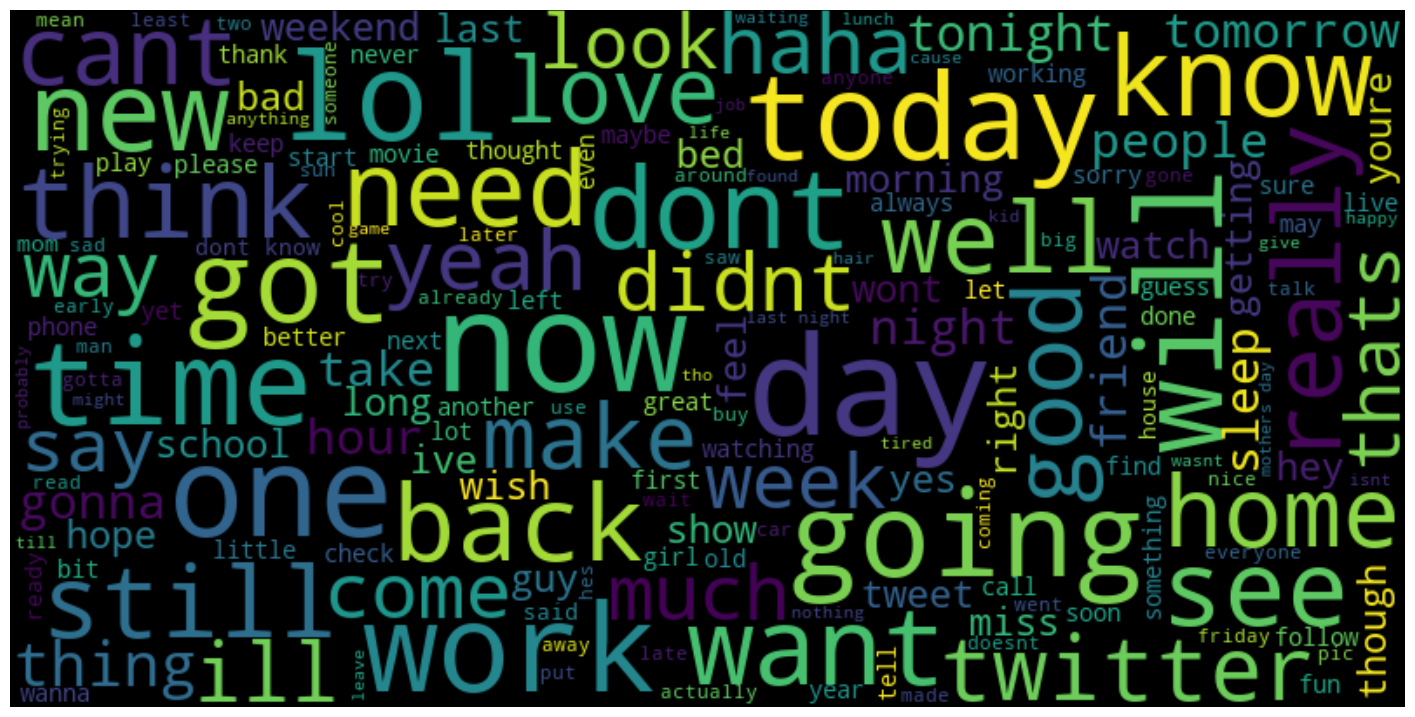

In [10]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_neutral)

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

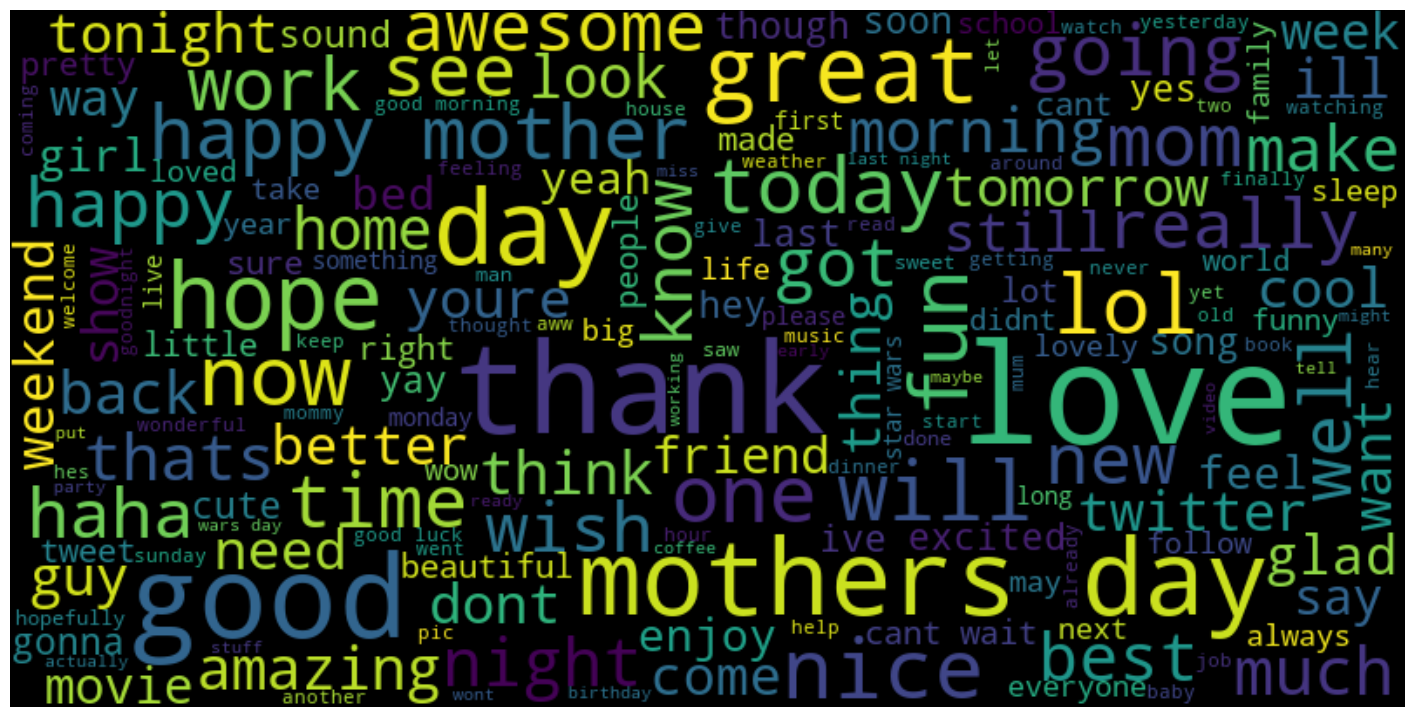

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_positive)
#wordcloud.generate(text_neutral) o altri paramentri

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

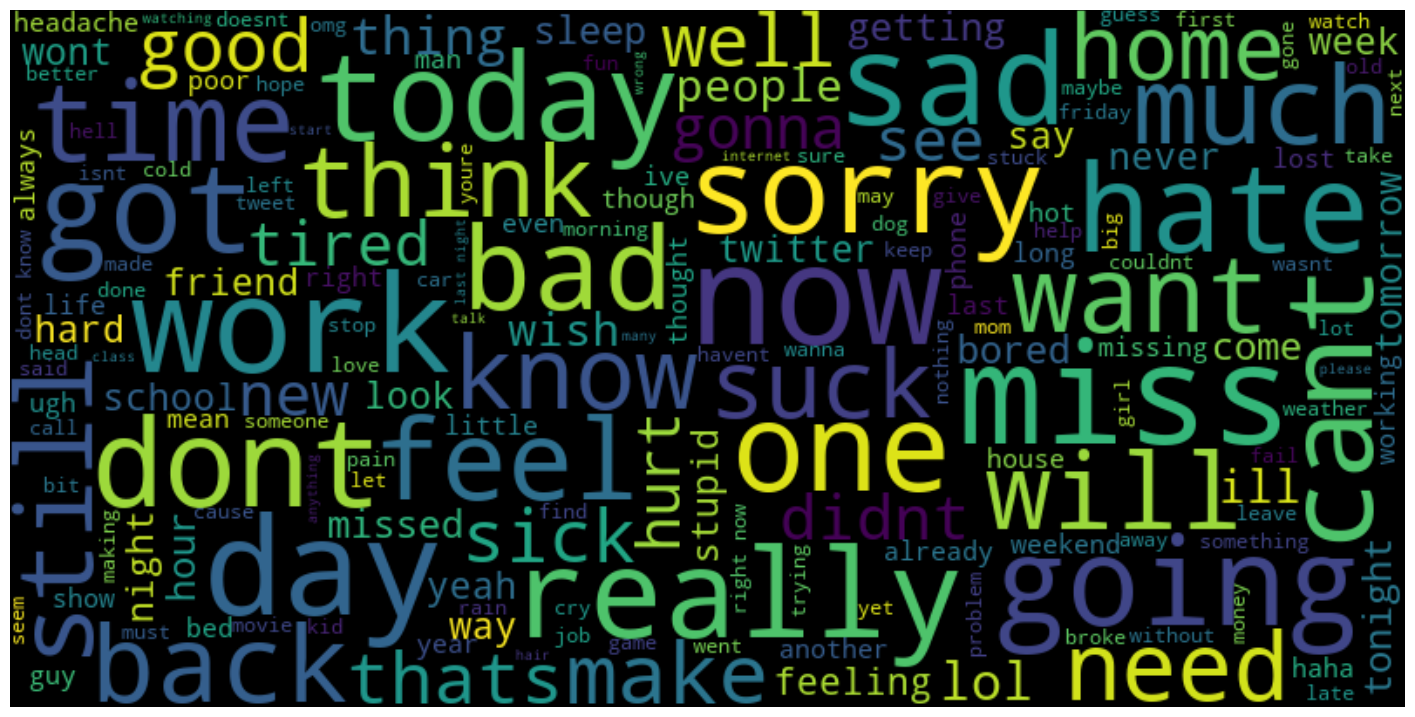

In [12]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_negative)
#wordcloud.generate(text_neutral) o altri paramentri

plt.figure(figsize=(18,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [13]:
df = df[['text', 'sentiment']]
df

text sentiment
0                              have responded were going   neutral
1                  sooo sad will miss you here san diego  negative
2                                         boss bullying   negative
3                             what interview leave alone  negative
4       sons why couldnt they put them the releases a...  negative
...                                                  ...       ...
27476   wish could come see denver husband lost his j...  negative
27477   ive wondered about rake the client has made c...  negative
27478   yay good for both you enjoy the break you pro...  positive
27479                                     but was worth   positive
27480    all this flirting going the atg smiles yay hugs   neutral

[27481 rows x 2 columns]

In [14]:
df.isnull().sum()

text         1
sentiment    0
dtype: int64

In [15]:
df = df.dropna()

In [16]:
X = df['text']
y = df['sentiment']

In [17]:
##STEP 4: Vettorizzazione
from sklearn.feature_extraction.text import CountVectorizer

#vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
X_vect.shape

(27480, 26406)

In [19]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.40999514798641434

In [28]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 
#provo il Multinomiale
# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.6057738961669092

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.62      0.55      0.58      2302
     neutral       0.56      0.63      0.60      3368
    positive       0.66      0.62      0.64      2574

    accuracy                           0.61      8244
   macro avg       0.61      0.60      0.61      8244
weighted avg       0.61      0.61      0.61      8244



Text(95.58159722222221, 0.5, 'Actual')

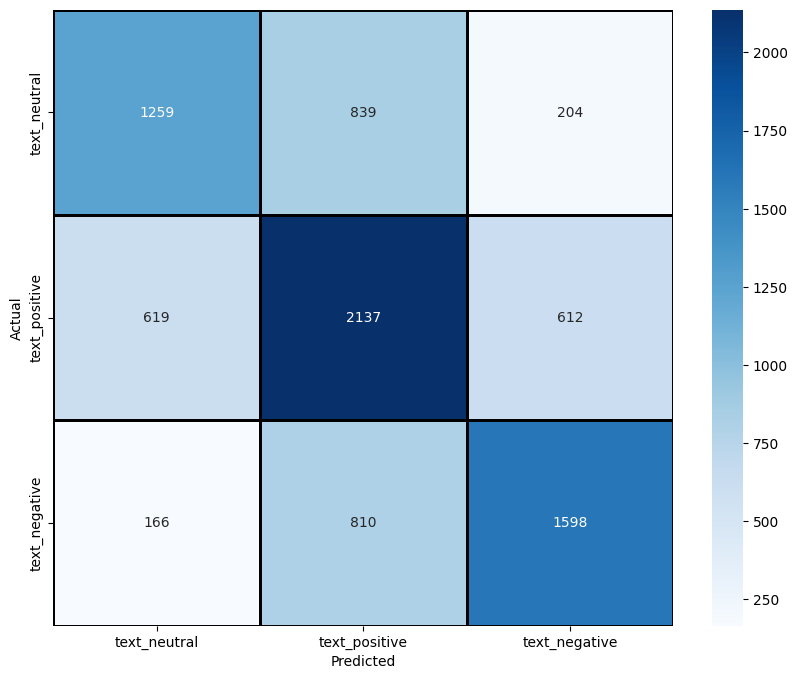

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [23]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(loss='log', penalty='l2',alpha=1e-3, random_state=667, max_iter=5, tol=None)
classifier.fit(X_train, y_train) 

y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,y_pred)
test_data_accuracy

0.5923095584667637

Text(95.58159722222221, 0.5, 'Actual')

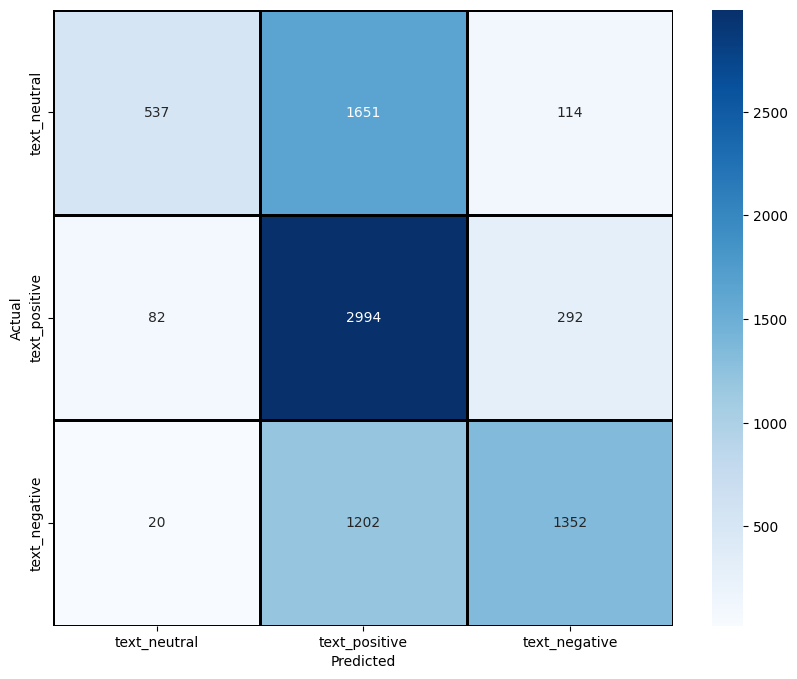

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = labels, 
            yticklabels = labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf =MultinomialNB(alpha=0.1)
#clf = classifier = MultinomialNB()

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.6494420184376516


In [34]:
from sklearn.metrics import classification_report
#labels = ['class1', 'class2']
print(classification_report(y_test, y_pred, target_names=labels))

               precision    recall  f1-score   support

 text_neutral       0.73      0.51      0.60      2302
text_positive       0.57      0.79      0.66      3368
text_negative       0.76      0.59      0.67      2574

     accuracy                           0.65      8244
    macro avg       0.69      0.63      0.64      8244
 weighted avg       0.68      0.65      0.65      8244



In [36]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.64541485 0.64075691 0.64774381 0.65152838 0.66375546 0.65152838
 0.64687045 0.64425036]
mean=0.648981077147016
std=0.0065190102422711515


In [37]:
import joblib
joblib.dump(pipe,'es2.pkl')

['es2.pkl']

In [41]:
import joblib

uploaded_model = joblib.load('es2.pkl')
pred = uploaded_model.predict(['beautiful']) # 1 --> Diabetic
pred[0]

'positive'